In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
sns.set()

<h3> Lectura del DataFrame

In [4]:
movies = pd.read_csv('movies_ML.csv')

In [5]:
#Los tipos de dato de las columnas fueron corregidos en el proceso de ETL
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45376 non-null  bool   
 1   belongs_to_collection  3160 non-null   object 
 2   budget                 45376 non-null  float64
 3   genres                 42992 non-null  object 
 4   homepage               7766 non-null   object 
 5   id                     45376 non-null  int64  
 6   imdb_id                45362 non-null  object 
 7   original_language      45365 non-null  object 
 8   original_title         45376 non-null  object 
 9   overview               44435 non-null  object 
 10  popularity             45376 non-null  float64
 11  poster_path            45037 non-null  object 
 12  production_companies   33580 non-null  object 
 13  production_countries   39165 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [6]:
movies.shape

(45376, 26)

In [7]:
movies.isnull().sum()
#Tenemos varios datos nulos

adult                        0
belongs_to_collection    42216
budget                       0
genres                    2384
homepage                 37610
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   0
poster_path                339
production_companies     11796
production_countries      6211
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3891
status                      80
tagline                  24978
title                        0
video                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
dtype: int64

In [8]:
#Porcentaje de datos faltantes
round(movies.isnull().mean()*100, 2)

adult                     0.00
belongs_to_collection    93.04
budget                    0.00
genres                    5.25
homepage                 82.89
id                        0.00
imdb_id                   0.03
original_language         0.02
original_title            0.00
overview                  2.07
popularity                0.00
poster_path               0.75
production_companies     26.00
production_countries     13.69
release_date              0.00
revenue                   0.00
runtime                   0.54
spoken_languages          8.58
status                    0.18
tagline                  55.05
title                     0.00
video                     0.00
vote_average              0.00
vote_count                0.00
return                    0.00
release_year              0.00
dtype: float64

<h3> Elimino las columnas que no voy a utilizar

In [9]:
movies = movies.drop(columns=['homepage', 'id', 'imdb_id', 'poster_path', 'spoken_languages', 'status', 'tagline', 'video'])

In [10]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,4.537600e+04,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,4.537600e+04,45376.000000
mean,4.232604e+06,2.926458,1.123010e+07,94.181675,5.624070,110.096439,6.600428e+02,1991.881193
std,1.743986e+07,6.009672,6.438996e+07,38.341059,1.915423,491.742894,7.469329e+04,24.055360
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,0.388840,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,1.130454,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,3.691695,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000


<h3> Gestión de valores faltantes

In [11]:
#Se pueden rellenar los datos faltantes de las columnas categóricas con "No-data"
for categoria in movies:
    if movies[categoria].dtypes == object:
        movies[categoria] = movies[categoria].fillna('No-data')

In [12]:
#Y los nulos de la columna numérica con 0
movies['runtime'] = movies['runtime'].fillna(0)

<h3> Análisis estadístico

In [13]:
#En este DataFrame eliminaré los valores duplicados
movies_normal = movies.drop_duplicates()

<h4> Presupuesto por película (búsqueda de outliers)

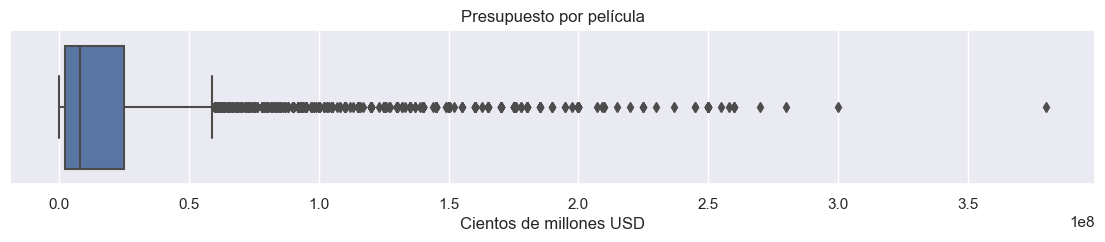

In [14]:
plt.figure(figsize = (14,2))
excluyendo0 = movies_normal[movies_normal['budget']>0]
sns.boxplot(data=excluyendo0, x='budget')

plt.xlabel('Cientos de millones USD')
plt.title('Presupuesto por película')
plt.show()

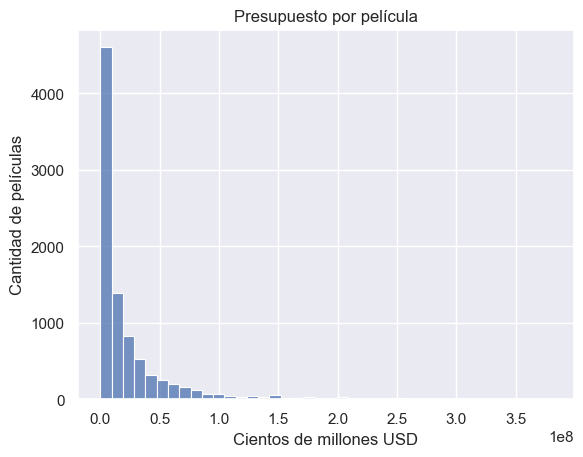

In [15]:
sns.histplot(data=movies_normal[movies_normal['budget']>1], x='budget' ,bins=40)
plt.xlabel('Cientos de millones USD')
plt.ylabel('Cantidad de películas')
plt.title('Presupuesto por película')

plt.show()

<h4> Recaudación por película (búsqueda de outliers)

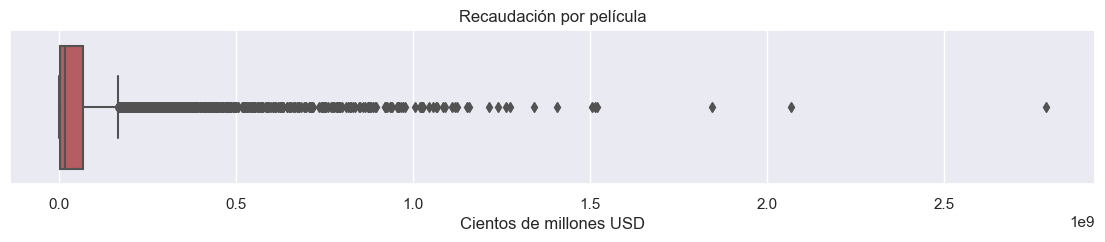

In [16]:
plt.figure(figsize = (14,2))
excluyendo0 = movies_normal[movies_normal['revenue']>1]
sns.boxplot(data=excluyendo0, x='revenue', color='r')

plt.xlabel('Cientos de millones USD')
plt.title('Recaudación por película')
plt.show()

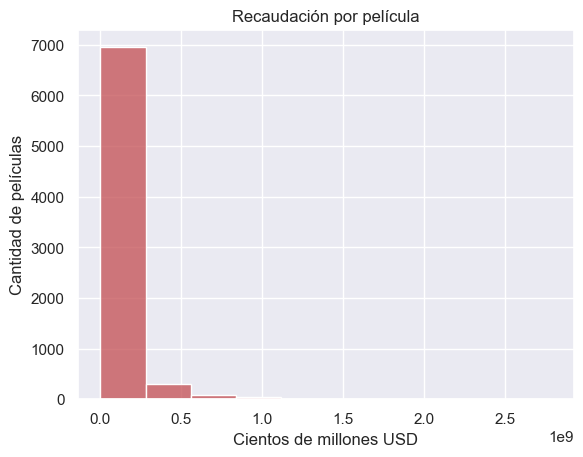

In [17]:
sns.histplot(data=movies_normal[movies_normal['revenue']>1], x='revenue' ,bins=10, color='r')
plt.xlabel('Cientos de millones USD')
plt.ylabel('Cantidad de películas')
plt.title('Recaudación por película')

plt.show()

<h4> Relación presupuesto/recaudación

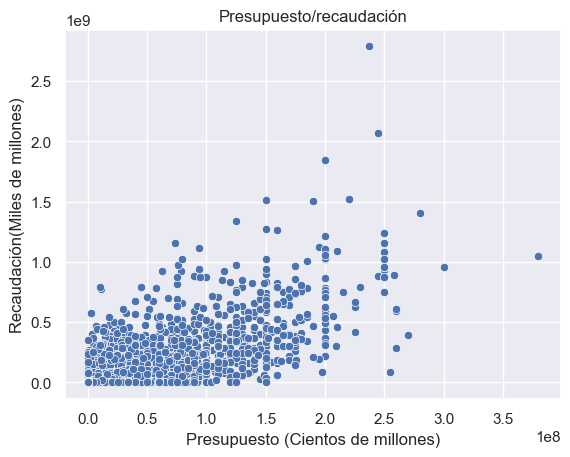

In [18]:
sns.scatterplot(data=movies_normal, x=movies_normal['budget'], y=movies_normal['revenue'])
plt.xlabel('Presupuesto (Cientos de millones)')
plt.ylabel('Recaudación(Miles de millones)')
plt.title('Presupuesto/recaudación')

plt.show()

In [19]:
#Esta es la película con mayor presupuesto
movies_normal[movies_normal['budget']>350000000]

,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,return,release_year
17115,False,No-data,380000000.0,"Adventure, Action, Fantasy",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.88772,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2011-05-14,1.045714e+09,136.0,Pirates of the Caribbean: On Stranger Tides,6.4,5068.0,2.751878,2011


In [20]:
#Esta es la película con mayor recaudación
movies_normal[movies_normal['revenue']>2500000000]

,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,return,release_year
14545,False,Sherlock Holmes Collection,237000000.0,"Action, Adventure, Fantasy, Science Fiction",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2.787965e+09,162.0,Avatar,7.2,12114.0,11.763566,2009


<h4> Películas estrenadas por año

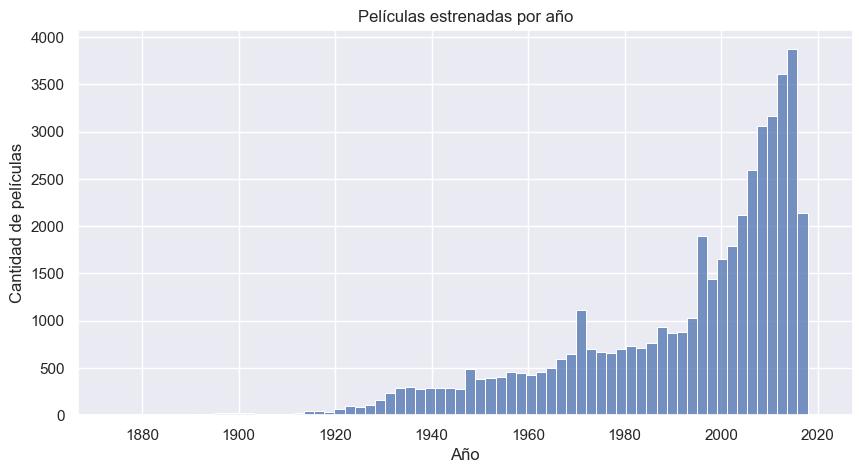

In [21]:
plt.figure(figsize = (10,5))
sns.histplot(data=movies_normal, x='release_year' ,bins=70)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Películas estrenadas por año')

plt.show()

<h3> Duración de las películas

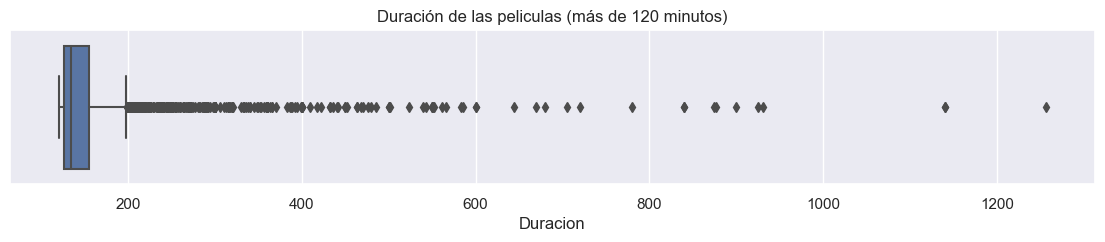

In [22]:
plt.figure(figsize = (14,2))
excluyendo0 = movies_normal[movies_normal['runtime']>120]
sns.boxplot(data=excluyendo0, x='runtime')

plt.xlabel('Duracion')
plt.title('Duración de las peliculas (más de 120 minutos)')
plt.show()

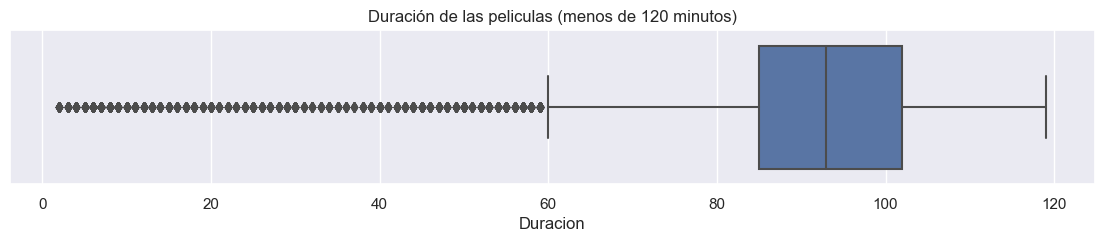

In [23]:
plt.figure(figsize = (14,2))
menos120 = movies_normal[(movies_normal['runtime']<120) & (movies_normal['runtime']>1)]
sns.boxplot(data=menos120, x='runtime')

plt.xlabel('Duracion')
plt.title('Duración de las peliculas (menos de 120 minutos)')
plt.show()

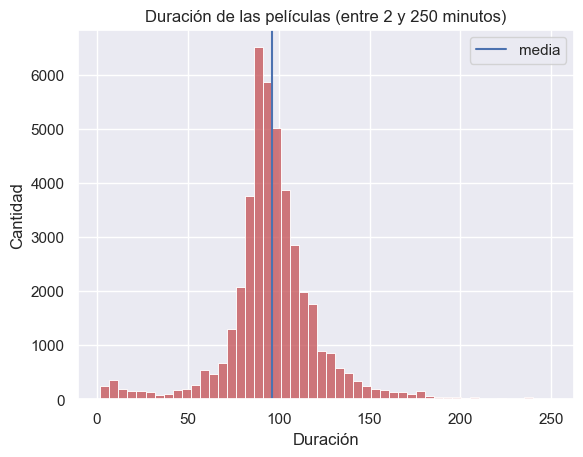

In [24]:
entre2y300 = movies_normal[(movies_normal['runtime']<251) & (movies_normal['runtime']>1)]
media = entre2y300['runtime'].mean()
sns.histplot(data=entre2y300, x='runtime' ,bins=50, color='r')
plt.axvline(x=media, color='b', linestyle='-', label='media')
plt.xlabel('Duración')
plt.ylabel('Cantidad')
plt.title('Duración de las películas (entre 2 y 250 minutos)')
plt.legend()
plt.show()

<h3> Votos y puntuación

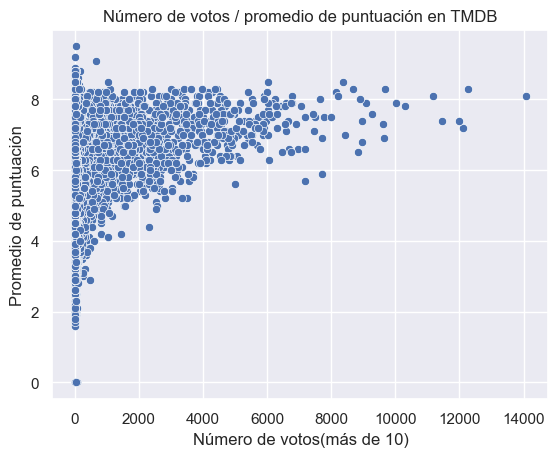

In [25]:
sns.scatterplot(data=movies_normal[movies_normal['vote_count']>10], x='vote_count', y='vote_average')
plt.xlabel('Número de votos(más de 10)')
plt.ylabel('Promedio de puntuación')
plt.title('Número de votos / promedio de puntuación en TMDB')
plt.show()

<h3> Correlación de las variables numéricas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19340\3084200351.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=movies_normal.corr(), annot=True, square=True, annot_kws={"size": 8})


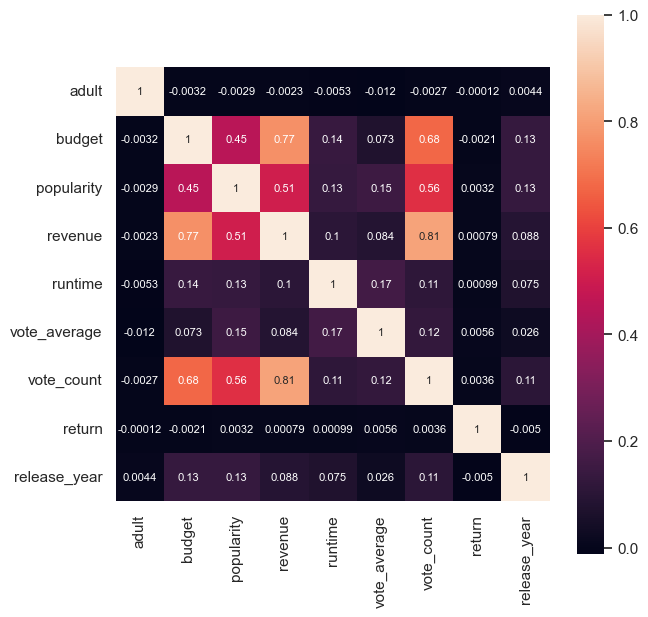

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(data=movies_normal.corr(), annot=True, square=True, annot_kws={"size": 8})
plt.show()

<h2> Modelamiento del sistema de recomendación

In [27]:
#Elimino las columnas que tienen correlación muy alta
#o que tienen correlación casi nula con todas las las otras variables
#también variables categóricas redundantes (ej., "original_title", "title")
#Me quedo únicamente con las columnas que se utilizarán para entrenar el modelo
df = movies.drop(columns=['adult', 'release_date', 'revenue', 'original_title','popularity', 'runtime', 'vote_count', 'return', 'release_year'])

In [28]:
#Reestablezco los índices
df = df.reset_index(drop=True)

In [29]:
#Relleno los datos faltantes con 0, y reemplazo los "No-data" con "0"
df = df.fillna(0)
df.replace({"No-data": '0'})


,belongs_to_collection,budget,genres,original_language,overview,production_companies,production_countries,title,vote_average
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",en,"Led by Woody, Andy's toys live happily in his ...",Pixar Animation Studios,United States of America,Toy Story,7.7
1,0,65000000.0,"Adventure, Fantasy, Family",en,When siblings Judy and Peter discover an encha...,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,Jumanji,6.9
2,Grumpy Old Men Collection,0.0,"Romance, Comedy",en,A family wedding reignites the ancient feud be...,"Warner Bros., Lancaster Gate",United States of America,Grumpier Old Men,6.5
3,0,16000000.0,"Comedy, Drama, Romance",en,"Cheated on, mistreated and stepped on, the wom...",Twentieth Century Fox Film Corporation,United States of America,Waiting to Exhale,6.1
4,Father of the Bride Collection,0.0,Comedy,en,Just when George Banks has recovered from his ...,"Sandollar Productions, Touchstone Pictures",United States of America,Father of the Bride Part II,5.7
...,...,...,...,...,...,...,...,...,...
45371,0,0.0,"Drama, Action, Romance",en,"Yet another version of the classic epic, with ...","Westdeutscher Rundfunk (WDR), Working Title Fi...","Canada, Germany, United Kingdom, United States...",Robin Hood,5.7
45372,0,0.0,Drama,tl,An artist struggles to finish his work while a...,Sine Olivia,Philippines,Century of Birthing,9.0
45373,0,0.0,"Action, Drama, Thriller",en,"When one of her hits goes wrong, a professiona...",American World Pictures,United States of America,Betrayal,3.8
45374,0,0.0,0,en,"In a small town live two brothers, one a minis...",Yermoliev,Russia,Satan Triumphant,0.0


El sistema de recomendación utilizará técnicas de procesamiento de lenguaje natural para entender el contenido de las películas
procesando toda la información disponible sobre las películas, como la franquicia, el género, , el presupuesto, la sinopsis y otra información que contiene el dataset "df", que ya está listo para trabajarse.

Para esto, necesito que toda la información esté en formato de texto.

In [30]:
#Convierto todos los valores a tipo str
for i in df.columns.values:
    df[i] = df[i].astype('str')


In [31]:
#Importo las librerías necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# Concateno todas las columnas del dataframe en una columna 'text'
df['text'] = df['belongs_to_collection'] + ' ' + df['budget'] + ' ' + df['genres'] + ' ' + df['original_language'] + ' ' + df['overview'] + ' ' + df['production_companies']+ ' ' + df['production_countries']  + ' ' + df['vote_average'] + ' ' + df['title']

In [33]:
#Desecho todas las columnas, excepto las que servirán para el modelo: el título de la película y el texto concatenado
df = df[['title', 'text']]

In [34]:
#Finalmente, guardo un nuevo archivo .csv que será consumido por la API para el sistema de recomendación
df.to_csv('movies_ML_training.csv', index=False)

In [35]:
# Creo la matriz de características con TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
overview_matrix = tfidf.fit_transform(df['text'])

Esta es la función de recomendación basada en similitud del coseno, que recibe el título de una película, y con los datos procesados gracias a TfidfVectorizer, puede analizar la similaridad de una película con todas las demás, y devuelve una lista con las 5 películas con el puntaje de similitud más alto

In [36]:
def recomendacion(titulo):
    if titulo not in df['title'].values:
        return {'ERROR': 'La película no existe'}
    idx = df[df['title']==titulo].index[0]
    sim_scores = cosine_similarity(overview_matrix[idx], overview_matrix)
    sim_scores = list(enumerate(sim_scores[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    respuesta = pd.DataFrame(df.iloc[movie_indices]['title'])
    respuesta = list(respuesta['title'].values)
    return {'lista recomendada': respuesta}

#Esta función estará en el archivo main.py, que la API podrá consumir
